# Project Planning Stages: Group project-004-21

A research group in Computer Science at UBC, led by Frank Wood set up a minecraft server and recorded the actions and various observations of players. They need to target their recruitment efforts to make sure they have enough resources to accommodate the number of players they attract.

**Players.csv**: A list of all unique players, 196 rows, 7 columns, includes variables:
- **experience**: character, shows how familiar a play is with the game
    - includes entries: amateur, beginner, regular, veteran, and pro.
- **subscribe**: logical, yes or no for if the player subscribed
- **hashedEmail**: character, string of characters that privately identify specific players' emails
- **played_hours**: Decimal Values, amount of time (hours) spent playing on this server
- **name**: character, name of player
- **gender**: character, gender of player
    - Consists of entries: male, female, non-binary, prefer not to say, two-spirited, Agender, and other.
- **age**: Decimal Values, age of player


## Questions

**Broad**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific**: Can the number of hours played predict subscription in player.csv?

**Justification**:
- The only two quantitative variables in data set are "age" and "played_hours", age has no correlation to subscription
- Other variables are all categorical, have not learned how to do this kind of classification in class
- Possible positive relationship between "player_hours" and likelihood to "subscribe"
- Many players who played 0 hours, may skew data, good to keep in mind


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Read in the data set!

In [2]:
players_URL<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players<-read_csv(players_URL)
head(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


### Wrangling the data:
- Renamed variables for consistancy
- Removed all NAs (so they don't skew data)
- Changed subscribe into a factor (allows this to be used as a response variable in classification later)

In [3]:
players<- players|>
    rename(hashed_email=hashedEmail)|>
    mutate(subcribe=as.factor(subscribe))|>
    select(experience,subscribe,hashed_email,played_hours,name,gender,age)|>
    drop_na()

head(players)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Summary statistics

**experience**:
- Count of each category is mostly equal across categories, with pro having the least players and amateur having the most
- Potentially need to oversample pro is using experience as predictor


In [4]:
experience_count<- players|>
    count(experience)|>
    arrange(desc(n))
experience_count

experience,n
<chr>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


**subscribe**:
- Most players subscribed


In [5]:
subscribe_count<- players|>
    count(subscribe)|>
    arrange(desc(n))
subscribe_count

subscribe,n
<lgl>,<int>
TRUE,144
FALSE,52


**played_hours**:
- High number of players playing 0 hours raises a concern, possibly skewing statistics like mean and sd
- Large range of time played (0-223.1)
- Mean is 5.85 (on lower end)
- SD 28.36 hours (high deviation, varrying interest in game)


In [6]:
played_hours_count<-players|>
    count(played_hours)|>
    arrange(desc(n))
head(played_hours_count)

played_hours_min<-players|>
    summarize(min_played_hours=min(played_hours))
played_hours_min

played_hours_max<-players|>
    summarize(max_played_hours=max(played_hours))
played_hours_max

played_hours_mean<-players|>
    summarize(mean_played_hours=mean(played_hours,na.rm=TRUE))|>
    round(digits=2)
played_hours_mean

played_hours_sd<-players|>
    summarize(standard_deviation_played_hours=sd(played_hours,na.rm=TRUE))|>
    round(digits=2)
played_hours_sd

played_hours,n
<dbl>,<int>
0.0,85
0.1,34
0.2,10
1.0,6
0.3,5
0.4,5


min_played_hours
<dbl>
0


max_played_hours
<dbl>
223.1


mean_played_hours
<dbl>
5.85


standard_deviation_played_hours
<dbl>
28.36


**gender**:
- Distribution very unequal, male is most common category by far

In [7]:
gender_count<-players|>
    count(gender)|>
    arrange(desc(n))
gender_count

gender,n
<chr>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Two-Spirited,6
Agender,2
Other,1


**age**:
- 8-99 years old, standard deviation 9.71(wide variation of ages playing)
- Mean age about 21(younger end)

In [8]:
age_count<-players|>
    count(age)|>
    arrange(desc(n))
head(age_count)

age_min<-players|>
    summarize(min_age=min(age,na.rm=TRUE))
age_min

age_max<-players|>
    summarize(max_age=max(age,na.rm=TRUE))
age_max

age_mean<-players|>
    summarize(mean_age=mean(age,na.rm=TRUE))|>
    round(digits=2)
age_mean

age_sd<-players|>
    summarize(standard_deviation_age=sd(age,na.rm=TRUE))|>
    round(digits=2)

age_sd

age,n
<dbl>,<int>
17,75
21,18
22,15
20,14
23,13
24,10


min_age
<dbl>
8


max_age
<dbl>
99


mean_age
<dbl>
21.28


standard_deviation_age
<dbl>
9.71


**name**: 
- Each name only listed once

In [9]:
name_count<-players|>
    count(name)
head(name_count)

name,n
<chr>,<int>
Aarav,1
Aaron,1
Adrian,1
Ahmed,1
Aiden,1
Akio,1


**hashedEmail**:
- Each email only recorded once

In [10]:
hashed_email<- players|>
    count(hashed_email)
head(hashed_email)

hashed_email,n
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,1
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1


## Exploratory Data Analysis and Visualization

- No correlation between age of a player and hours played (game appeals somewhat equally to all ages)
- No relationship between subscription and player’s age
- Possible positive relationship between played hours and subscription (as hours played increases, subscriptions increase (people not subscribing dreases))

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


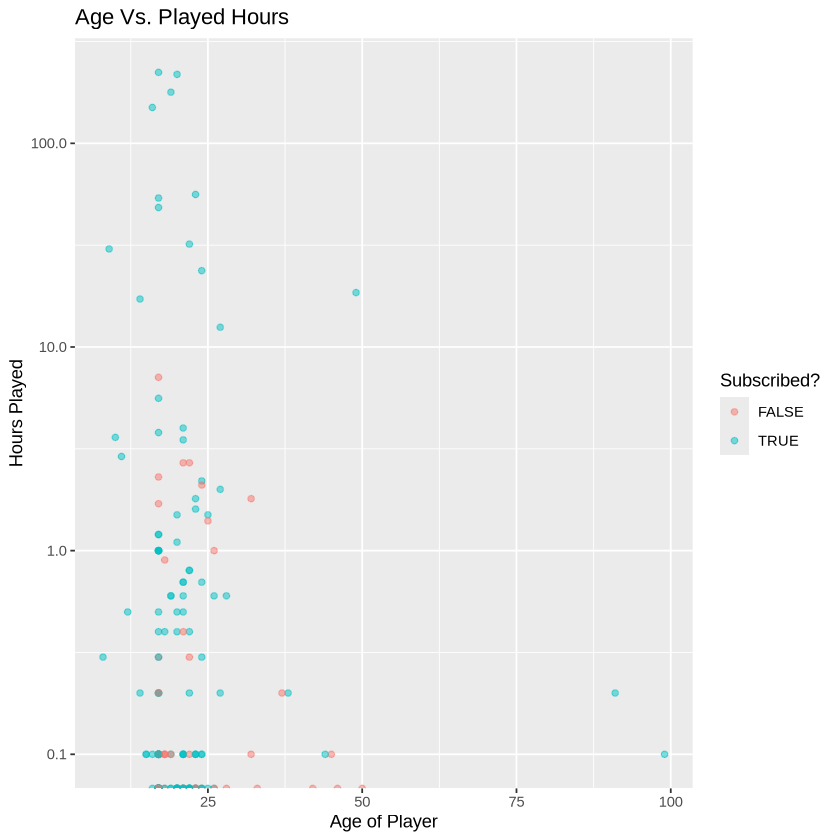

In [11]:
age_vs_played_hours <- players|>
    ggplot(aes(x=age, y=played_hours, color= subscribe))+
        geom_point(alpha=0.5) +
        scale_y_log10() +
        labs(x="Age of Player", y="Hours Played", color="Subscribed?")+
        ggtitle("Age Vs. Played Hours")

age_vs_played_hours

- Shows the need to oversample the rare category (False) because data has uneven distribution


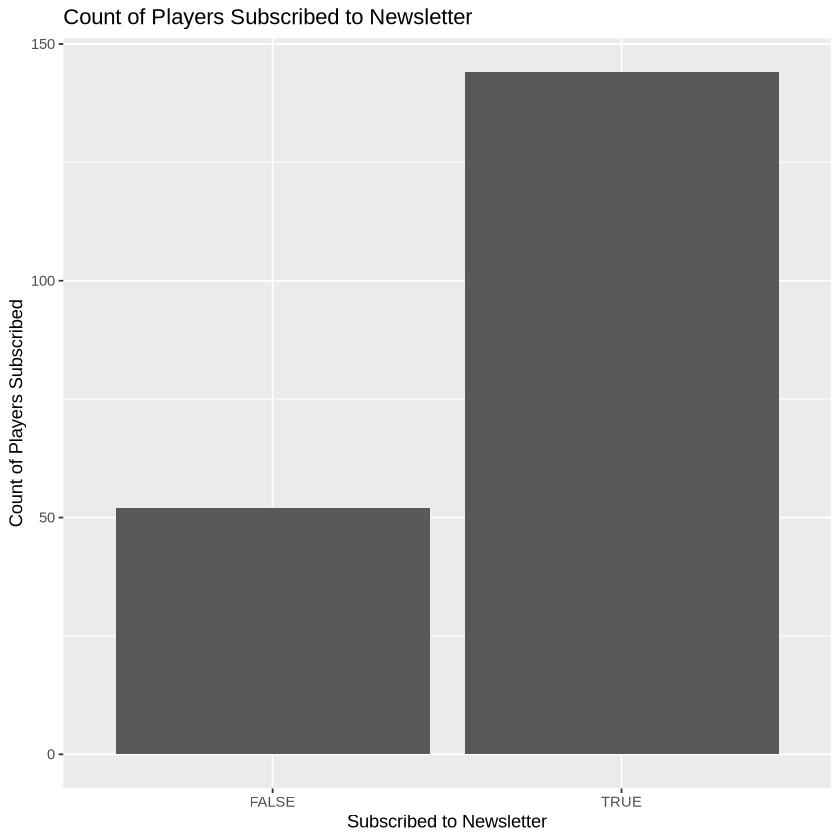

In [12]:
subscription_graph<- subscribe_count|>
    ggplot(aes(x=subscribe,y=n,))+
        geom_bar(stat="identity")+
        labs(x="Subscribed to Newsletter", y="Count of Players Subscribed")+
        ggtitle("Count of Players Subscribed to Newsletter")

subscription_graph

- Inequality between the number of players in each gender category (some of the categories will have to be oversampled) (everything but "male")
- 100% of individuals in the "Agender" and "Other" categories subscribed but this could be due to the small sample size are their lack of representation in the data set
- Gender not a good predictor of subscription because not enough data points for each category

gender,total,subscribed,percent_subscribed
<chr>,<int>,<int>,<dbl>
Agender,2,2,100.00000
Female,37,29,78.37838
Male,124,93,75.00000
Non-binary,15,11,73.33333
Other,1,1,100.00000
Prefer not to say,11,4,36.36364
Two-Spirited,6,4,66.66667


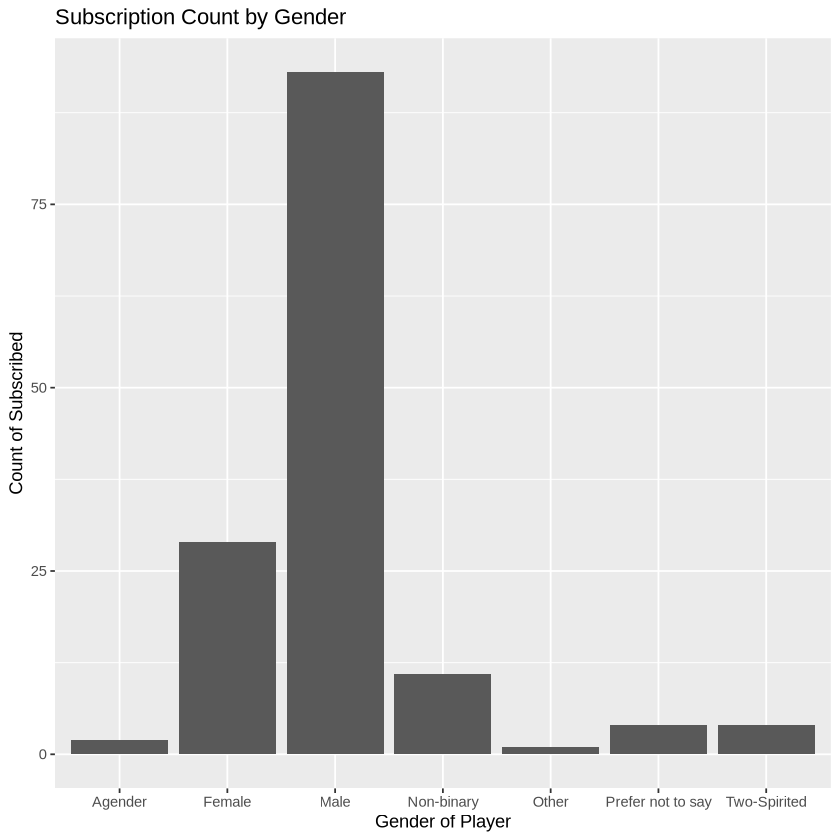

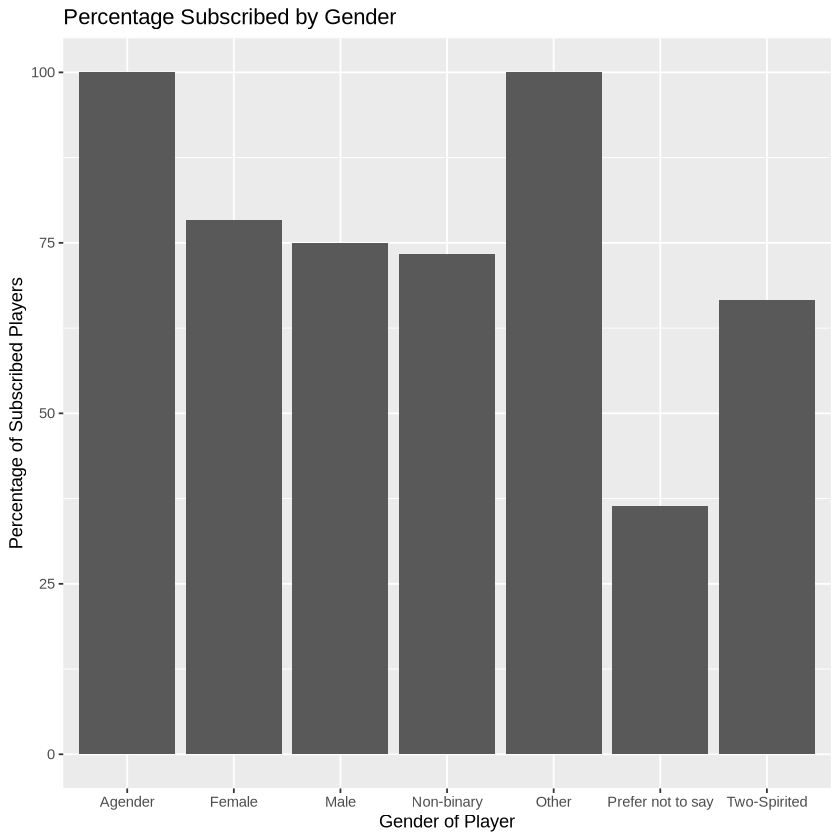

In [13]:
ratio_gender_subscribed <- players |>
  group_by(gender) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percent_subscribed = (subscribed / total)*100)

ratio_gender_subscribed 

gender_subscribed_bar <- ratio_gender_subscribed|>
    ggplot(aes(x=gender, y=subscribed))+
        geom_bar(stat="identity") + 
        labs(x="Gender of Player", y="Count of Subscribed")+
        ggtitle("Subscription Count by Gender")

gender_subscribed_bar

gender_subscribed_ratio_bar <- ratio_gender_subscribed|>
    ggplot(aes(x=gender, y=percent_subscribed))+
        geom_bar(stat="identity") +
        labs(x="Gender of Player", y="Percentage of Subscribed Players")+
        ggtitle("Percentage Subscribed by Gender")

gender_subscribed_ratio_bar



- "Amateur" over-represented, "Pro" is a bit under-represented (would have to be some over-sampling to make up for the categories with fewer data points)
- No relationship between experience level and subscription count (all the percentages of subscribed players in each category are very close and show no trend)
- Player experience not a good predictor of subscription

experience,total,subscribed,percentage_subscribed
<chr>,<int>,<int>,<dbl>
Amateur,63,45,71.42857
Beginner,35,27,77.14286
Pro,14,10,71.42857
Regular,36,29,80.55556
Veteran,48,33,68.75000


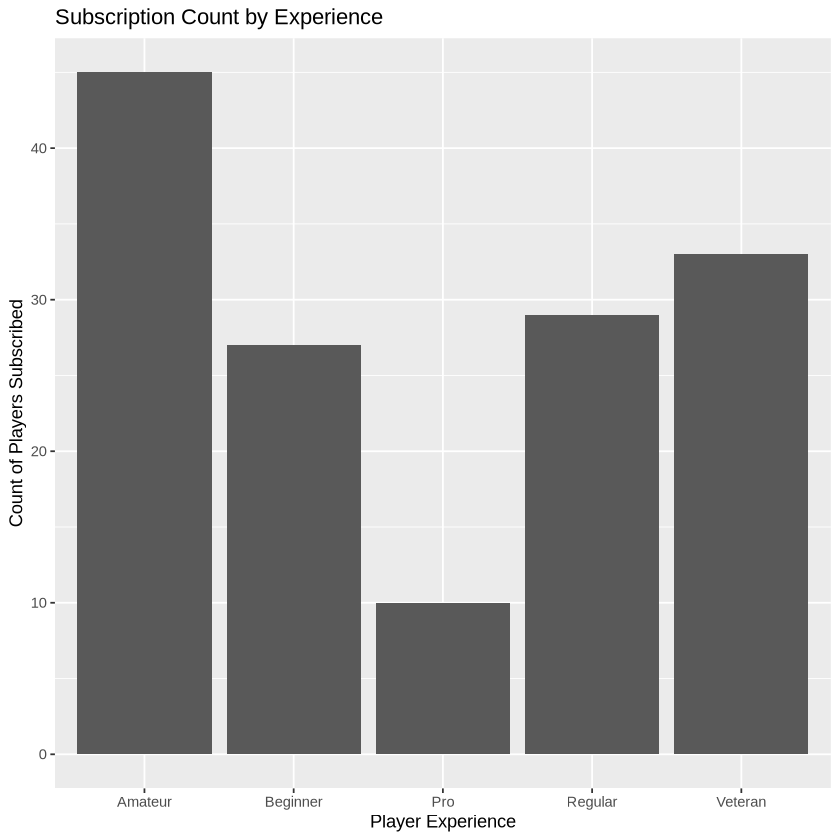

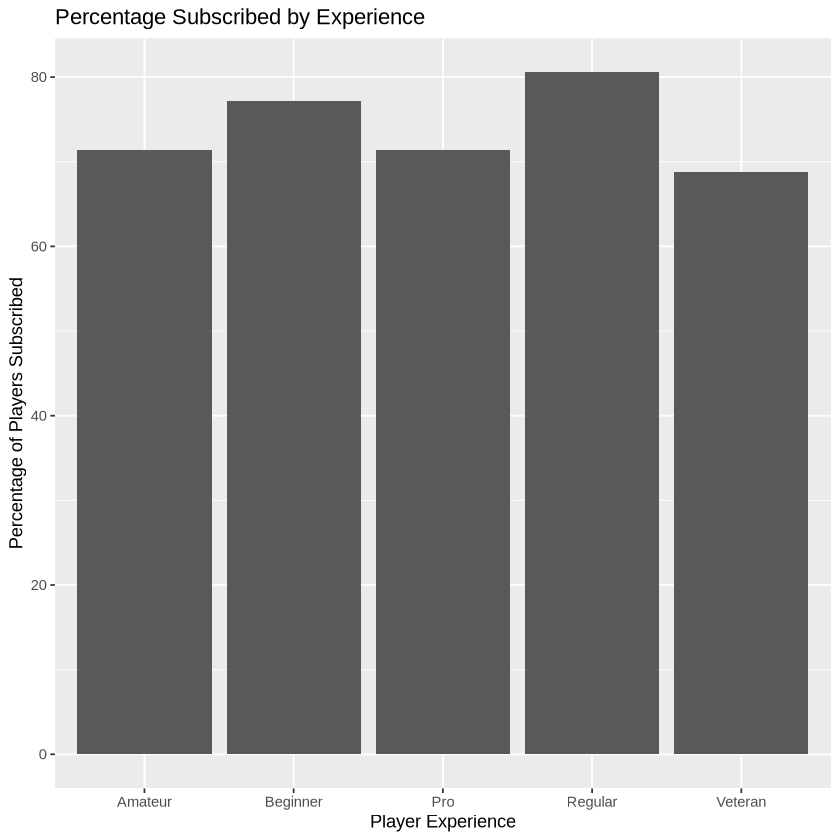

In [14]:
ratio_experience_subscribed <- players |>
  group_by(experience) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percentage_subscribed = (subscribed / total)*100)

ratio_experience_subscribed

experience_subscribed_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=subscribed))+
geom_bar(stat="identity") +
labs(x="Player Experience", y="Count of Players Subscribed")+
ggtitle("Subscription Count by Experience")

experience_subscribed_bar

experience_subscribed_ratio_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=percentage_subscribed))+
geom_bar(stat="identity") +
labs(x="Player Experience", y="Percentage of Players Subscribed")+
ggtitle("Percentage Subscribed by Experience")
experience_subscribed_ratio_bar


## Methods and Plan

To investigate if the number of hours played predicts subscription in player.csv, KNN classification would be an appropriate model to use because the variable of interest (subscribe) is categorical and, after wrangling, has been made into a factor (suitable for KNN classification). This model has a simple and intuitive algorithm, can capture non-linear relationships (between played_hours and subscribe in this case), and requires no assumptions about what the data looks like. K-NN assumes that nearby points are similar (similar predictors can predict similar outcomes).

Potential limitations of KNN classification are that it is slow at training large data sets, it may not perform well with a large number of predictors, and it may not predict well beyond the range of values in the data set.

To perform KNN classification, the first step would to be setting a seed to ensure reproducibility. Then we would have to oversample the rare class (FALSE) category of “subscribe” because it is under-represented compared to the TRUE category. Then we would split the data 70% training set and 30% testing set using the “initial_split” function, which would shuffle and stratify the data.

The testing set will be set aside and not touched until the model is built and ready to be tested. If we were using multiple predictor variables, we would scale the data so one variable doesn't have a greater effect on the dependent variable, but since we are only using one variable, we don't need to scale that data. Then, we perform a 5-fold cross-validation to find the best number of neighbors then assess the model using the K values with the highest accuracy on the testing set.
